In [42]:
!pip install mlxtend

In [154]:
!pip install pythainlp

     |████████████████████████████████| 11.0 MB 4.2 MB/s 
     |████████████████████████████████| 743 kB 39.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [155]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2021-10-17 11:28:34--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-10-17 11:28:34--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2021-10-17 11:28:35 (5.15 MB/s) - ‘t

In [156]:
import matplotlib.pyplot as plt  
from pythainlp.tokenize import word_tokenize 
from wordcloud import WordCloud 
from pythainlp.corpus import thai_stopwords 
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') 
mpl.rc('font', family='TH Sarabun New')

In [122]:
import pandas as pd

# df = pd.read_csv('BreadBasket_DMS.csv')
df = pd.read_csv('Customer Preference Survey (Responses) - Form Responses 1.csv')

In [ ]:
df.head(5)

In [91]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [92]:
missing = df.isnull().sum()
print(missing)

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [93]:
df['Item'].value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Chicken sand       1
Bacon              1
The BART           1
Polenta            1
Gift voucher       1
Name: Item, Length: 95, dtype: int64

In [94]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [95]:
df.loc[df["Item"]=='NONE'].shape[0]

df = df[df["Item"] != 'NONE']

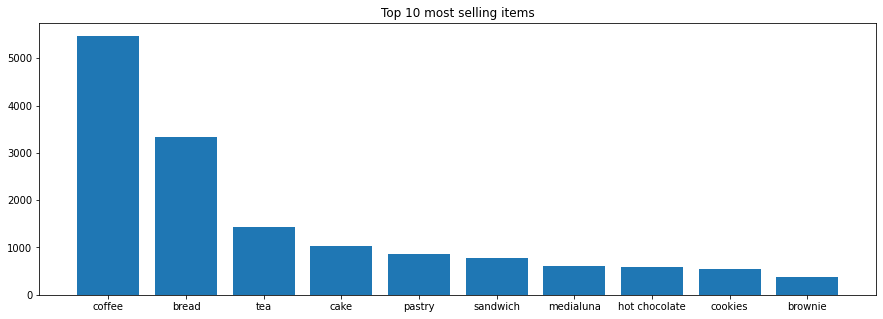

In [96]:
import numpy as np
import matplotlib.pyplot as plt

df_for_top10_Items=df['Item'].value_counts().head(10)
Item_array= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name=['coffee','bread','tea','cake','pastry','sandwich','medialuna','hot chocolate','cookies','brownie']
plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 most selling items')
plt.show()


In [97]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count()
hot_encoded_df

Transaction  Item         
1            Bread            1
2            Scandinavian     2
3            Cookies          1
             Hot chocolate    1
             Jam              1
                             ..
9682         Tacos/Fajita     1
             Tea              1
9683         Coffee           1
             Pastry           1
9684         Smoothies        1
Name: Item, Length: 18887, dtype: int64

In [98]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [151]:
df1 = df.copy()
df1.head(5)

,index,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
3,4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,5,10/17/2021 17:43:55,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ


In [ ]:
# def encode_units(x):

#     if "ไม่" in str(x) :
#       return 0
#     elif "ไม่" not in str(x) :
#       return 1

# hot_encoded_df = df.applymap(encode_units)

In [152]:
df1 = df1.drop(['Timestamp','index'],axis =1)
df1 = df1[1:41]

df1.replace(['ไม่เคยซื้อ','ไม่','ไม่เคย','ไม่เคยซือ'],0,inplace = True)
df1.replace(['เคยซื้อ','เคย'],1,inplace = True)

df1 = df1.fillna(0)
df1

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,1.0,0,0,0,0,1,0,0.0,1,1.0,0,0,0
2,0,0,0,1,1,0,0,1.0,1,1,0,1,1,0,0,0,0,0,0,0,1,1.0,0.0,1,0.0,0,0,1,1.0,1,1,0,1,1,0,1.0,1,1.0,1,1,1
3,0,0,0,0,0,0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,1,0,0.0,1,1.0,0,0,0
4,0,0,0,1,0,1,0,1.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0.0,0.0,1,0.0,0,0,1,1.0,1,1,0,0,1,1,0.0,1,1.0,0,1,0
5,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1,0.0,0,0,0,0.0,0,0,0,0,1,0,0.0,1,0.0,0,1,0
6,0,0,0,0,0,0,0,0.0,1,0,0,1,1,0,0,1,0,0,0,1,0,0.0,0.0,0,0.0,0,0,0,0.0,0,1,0,1,1,0,0.0,1,0.0,0,1,0
7,0,0,0,1,1,0,0,0.0,1,0,0,1,1,0,0,0,0,1,0,0,1,1.0,0.0,0,0.0,1,0,0,1.0,0,1,0,1,1,0,0.0,1,0.0,1,1,1
8,0,0,0,0,0,0,0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0.0,1,0,0,0.0,0,0,0,0,1,0,0.0,0,0.0,1,1,0
9,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1,0.0,0,0,0,0.0,0,0,0,1,1,0,0.0,1,0.0,1,0,0
10,0,0,0,0,1,0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,1,0,1,1,0,0.0,1,0.0,1,1,0


In [99]:
hot_encoded_df.head(5)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)
hot_encoded_df

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [205]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True,max_len=2)
# frequent_itemsets = apriori()

In [206]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(แก้วเก็บความเย็น),(playstation5),0.692308,0.025641,0.025641,0.037037,1.444444,0.007890,1.011834
1,(playstation5),(แก้วเก็บความเย็น),0.025641,0.692308,0.025641,1.000000,1.444444,0.007890,inf
2,(playstation5),(Kindle),0.025641,0.153846,0.025641,1.000000,6.500000,0.021696,inf
3,(Kindle),(playstation5),0.153846,0.025641,0.025641,0.166667,6.500000,0.021696,1.169231
4,(playstation5),(Bluetooth Speaker),0.025641,0.743590,0.025641,1.000000,1.344828,0.006575,inf
5,(Bluetooth Speaker),(playstation5),0.743590,0.025641,0.025641,0.034483,1.344828,0.006575,1.009158
6,(PS5),(playstation5),0.025641,0.025641,0.025641,1.000000,39.000000,0.024984,inf
7,(playstation5),(PS5),0.025641,0.025641,0.025641,1.000000,39.000000,0.024984,inf
8,(Mechanical keyboard),(playstation5),0.487179,0.025641,0.025641,0.052632,2.052632,0.013149,1.028490
9,(playstation5),(Mechanical keyboard),0.025641,0.487179,0.025641,1.000000,2.052632,0.013149,inf


In [208]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) &
       (rules['support'] >= 0.5)].sort_values(['lift','support'],ascending = False).head(30)
# rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
874,(พลาสเตอร์บรรเทาปวด ตราเสือ),(External Harddisk),0.589744,0.794872,0.538462,0.913043,1.148668,0.069691,2.358974
875,(External Harddisk),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.794872,0.589744,0.538462,0.677419,1.148668,0.069691,1.271795
880,(ยาดม),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.846154,0.589744,0.564103,0.666667,1.130435,0.065089,1.230769
881,(พลาสเตอร์บรรเทาปวด ตราเสือ),(ยาดม),0.589744,0.846154,0.564103,0.956522,1.130435,0.065089,3.538462
510,(ยาดม),(Bluetooth Speaker),0.846154,0.743590,0.666667,0.787879,1.059561,0.037475,1.208791
511,(Bluetooth Speaker),(ยาดม),0.743590,0.846154,0.666667,0.896552,1.059561,0.037475,1.487179
360,(แก้วเก็บความเย็น),(ยาดม),0.692308,0.846154,0.615385,0.888889,1.050505,0.029586,1.384615
361,(ยาดม),(แก้วเก็บความเย็น),0.846154,0.692308,0.615385,0.727273,1.050505,0.029586,1.128205
884,(ขนมจีนน้ำยาปู),(Salmon Sashimi),0.666667,0.923077,0.641026,0.961538,1.041667,0.025641,2.000000
885,(Salmon Sashimi),(ขนมจีนน้ำยาปู),0.923077,0.666667,0.641026,0.694444,1.041667,0.025641,1.090909


In [210]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) &
       (rules['support'] >= 0.5)].sort_values(['confidence','support'],ascending = False).head(30)
# rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
884,(ขนมจีนน้ำยาปู),(Salmon Sashimi),0.666667,0.923077,0.641026,0.961538,1.041667,0.025641,2.000000
868,(พลาสเตอร์บรรเทาปวด ตราเสือ),(Salmon Sashimi),0.589744,0.923077,0.564103,0.956522,1.036232,0.019724,1.769231
881,(พลาสเตอร์บรรเทาปวด ตราเสือ),(ยาดม),0.589744,0.846154,0.564103,0.956522,1.130435,0.065089,3.538462
904,(ยาดม),(Salmon Sashimi),0.846154,0.923077,0.794872,0.939394,1.017677,0.013807,1.269231
901,(External Harddisk),(Salmon Sashimi),0.794872,0.923077,0.743590,0.935484,1.013441,0.009862,1.192308
502,(Bluetooth Speaker),(Salmon Sashimi),0.743590,0.923077,0.692308,0.931034,1.008621,0.005917,1.115385
874,(พลาสเตอร์บรรเทาปวด ตราเสือ),(External Harddisk),0.589744,0.794872,0.538462,0.913043,1.148668,0.069691,2.358974
511,(Bluetooth Speaker),(ยาดม),0.743590,0.846154,0.666667,0.896552,1.059561,0.037475,1.487179
360,(แก้วเก็บความเย็น),(ยาดม),0.692308,0.846154,0.615385,0.888889,1.050505,0.029586,1.384615
935,(External Harddisk),(ยาดม),0.794872,0.846154,0.692308,0.870968,1.029326,0.019724,1.192308


In [196]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True,max_len=3)
# frequent_itemsets = apriori()

In [198]:
len(rules)

26098

In [197]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(แก้วเก็บความเย็น),(playstation5),0.692308,0.025641,0.025641,0.037037,1.444444,0.007890,1.011834
1,(playstation5),(แก้วเก็บความเย็น),0.025641,0.692308,0.025641,1.000000,1.444444,0.007890,inf
2,(playstation5),(Kindle),0.025641,0.153846,0.025641,1.000000,6.500000,0.021696,inf
3,(Kindle),(playstation5),0.153846,0.025641,0.025641,0.166667,6.500000,0.021696,1.169231
4,(playstation5),(Bluetooth Speaker),0.025641,0.743590,0.025641,1.000000,1.344828,0.006575,inf
5,(Bluetooth Speaker),(playstation5),0.743590,0.025641,0.025641,0.034483,1.344828,0.006575,1.009158
6,(PS5),(playstation5),0.025641,0.025641,0.025641,1.000000,39.000000,0.024984,inf
7,(playstation5),(PS5),0.025641,0.025641,0.025641,1.000000,39.000000,0.024984,inf
8,(Mechanical keyboard),(playstation5),0.487179,0.025641,0.025641,0.052632,2.052632,0.013149,1.028490
9,(playstation5),(Mechanical keyboard),0.025641,0.487179,0.025641,1.000000,2.052632,0.013149,inf


In [204]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) &
       (rules['support'] >= 0.5)].sort_values(['lift','support'],ascending = False).head(20)
# rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25617,"(ยาดม, External Harddisk)",(พลาสเตอร์บรรเทาปวด ตราเสือ),0.692308,0.589744,0.512821,0.740741,1.256039,0.104536,1.582418
25620,(พลาสเตอร์บรรเทาปวด ตราเสือ),"(ยาดม, External Harddisk)",0.589744,0.692308,0.512821,0.869565,1.256039,0.104536,2.358974
25527,"(ยาดม, Salmon Sashimi)",(พลาสเตอร์บรรเทาปวด ตราเสือ),0.794872,0.589744,0.564103,0.709677,1.203366,0.095332,1.413105
25530,(พลาสเตอร์บรรเทาปวด ตราเสือ),"(ยาดม, Salmon Sashimi)",0.589744,0.794872,0.564103,0.956522,1.203366,0.095332,4.717949
25528,"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)",(ยาดม),0.564103,0.846154,0.564103,1.000000,1.181818,0.086785,inf
25529,(ยาดม),"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)",0.846154,0.564103,0.564103,0.666667,1.181818,0.086785,1.307692
25509,"(External Harddisk, Salmon Sashimi)",(พลาสเตอร์บรรเทาปวด ตราเสือ),0.743590,0.589744,0.512821,0.689655,1.169415,0.074293,1.321937
25512,(พลาสเตอร์บรรเทาปวด ตราเสือ),"(External Harddisk, Salmon Sashimi)",0.589744,0.743590,0.512821,0.869565,1.169415,0.074293,1.965812
874,(พลาสเตอร์บรรเทาปวด ตราเสือ),(External Harddisk),0.589744,0.794872,0.538462,0.913043,1.148668,0.069691,2.358974
875,(External Harddisk),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.794872,0.589744,0.538462,0.677419,1.148668,0.069691,1.271795


In [104]:
len(rules)

42

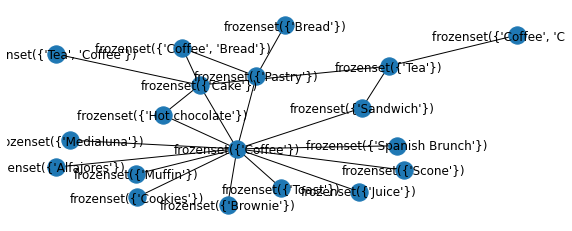

In [105]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [165]:
# ลำโพง กับ การ์ดจอ ไม่มีคนเลือก เป็น NaN

df2 = df1.drop(['การ์ดจอ RTX 3080','ลำโพง pixel'],axis = 1)
df2

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,1.0,0,0,0,1,0,0.0,1,1.0,0,0,0
2,0,0,0,1,1,0,0,1.0,1,1,0,1,1,0,0,0,0,0,0,1,1.0,0.0,1,0.0,0,0,1,1.0,1,1,1,1,0,1.0,1,1.0,1,1,1
3,0,0,0,0,0,0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0,0.0,0,0,0,0.0,0,0,0,1,0,0.0,1,1.0,0,0,0
4,0,0,0,1,0,1,0,1.0,1,0,0,1,1,0,0,1,0,0,0,0,0.0,0.0,1,0.0,0,0,1,1.0,1,1,0,1,1,0.0,1,1.0,0,1,0
5,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1,0.0,0,0,0,0.0,0,0,0,1,0,0.0,1,0.0,0,1,0
6,0,0,0,0,0,0,0,0.0,1,0,0,1,1,0,0,1,0,0,1,0,0.0,0.0,0,0.0,0,0,0,0.0,0,1,1,1,0,0.0,1,0.0,0,1,0
7,0,0,0,1,1,0,0,0.0,1,0,0,1,1,0,0,0,1,0,0,1,1.0,0.0,0,0.0,1,0,0,1.0,0,1,1,1,0,0.0,1,0.0,1,1,1
8,0,0,0,0,0,0,0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0.0,1,0,0,0.0,0,0,0,1,0,0.0,0,0.0,1,1,0
9,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1,0.0,0,0,0,0.0,0,0,1,1,0,0.0,1,0.0,1,0,0
10,0,0,0,0,1,0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,1,1,1,0,0.0,1,0.0,1,1,0


In [167]:
# item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)
item_item_matrix = pd.DataFrame(index=df2.columns,columns=df2.columns)
item_item_matrix

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
playstation5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่องทำขนมปัง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ergonomic Wrist Rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่องอบผ้า,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่องชงกาแฟแคปซูล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เก้าอี้ LA-Z-Boy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่องให้อาหารสัตว์อัตโนมัติ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
บัตตาเลี่ยน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แก้วเก็บความเย็น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ลู่วิ่งออกกำลังกาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df = df.fillna(0)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [168]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df2.iloc[:,i],df2.iloc[:,j])

item_item_matrix

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
playstation5,1,0,0,0,0,0,0,0,0.19245,0,0.408248,0,0.185695,0,1,0,0,0,0,0,0.229416,0.408248,0.235702,0,0,0,0,0,0,0,0,0.166667,0,0,0.179605,0.218218,0,0.174078,0
เครื่องทำขนมปัง,0,1,0,0,0.408248,0,0,0,0.272166,0,0.57735,0.316228,0.131306,0,0,0,0.316228,0,0,0.392232,0.324443,0,0,0.316228,0,0,0,0.223607,0,0.294884,0.27735,0.235702,0,0.471405,0.254,0.308607,0.176777,0.246183,0.288675
Ergonomic Wrist Rest,0,0,1,0,0,0,0.5,0.223607,0.136083,0,0,0.316228,0.262613,0.707107,0,0.316228,0.316228,0,0.353553,0,0.162221,0.288675,0.333333,0.316228,0.365148,0,0,0.223607,0,0.294884,0,0.235702,0.353553,0.235702,0.254,0.154303,0.176777,0.246183,0.288675
เครื่องอบผ้า,0,0,0,1,0.353553,0.288675,0.288675,0.387298,0.471405,0.288675,0,0.547723,0.379049,0,0,0.182574,0.182574,0,0,0.452911,0.374634,0.333333,0.3849,0.182574,0.316228,0,0.5,0.645497,0.333333,0.425628,0.320256,0.340207,0.204124,0.272166,0.293294,0.356348,0.306186,0.426401,0.333333
เครื่องชงกาแฟแคปซูล,0,0.408248,0,0.353553,1,0.204124,0,0.365148,0.611111,0.204124,0.353553,0.516398,0.589662,0,0,0.129099,0.516398,0.166667,0.144338,0.560449,0.463586,0.117851,0.272166,0.129099,0.298142,0,0.235702,0.365148,0.471405,0.481543,0.509525,0.529238,0,0.3849,0.466628,0.503953,0.433013,0.603023,0.353553
เก้าอี้ LA-Z-Boy,0,0,0,0.288675,0.204124,1,0,0.447214,0.272166,0,0,0.316228,0.262613,0,0,0.316228,0.316228,0,0,0.196116,0,0,0.166667,0,0.182574,0,0.288675,0.223607,0.57735,0.294884,0,0.235702,0.353553,0.235702,0.254,0.308607,0.176777,0.246183,0
เครื่องให้อาหารสัตว์อัตโนมัติ,0,0,0.5,0.288675,0,0,1,0.223607,0.272166,0.25,0,0.316228,0.262613,0.707107,0,0.316228,0.316228,0,0.353553,0.196116,0.324443,0.288675,0.333333,0.632456,0.365148,0,0.288675,0.447214,0,0.294884,0.138675,0.235702,0.353553,0.471405,0.254,0.308607,0.353553,0.246183,0.288675
บัตตาเลี่ยน,0,0,0.223607,0.387298,0.365148,0.447214,0.223607,1,0.426006,0.447214,0,0.494975,0.58722,0,0,0.141421,0.141421,0.182574,0,0.263117,0.362738,0.387298,0.596285,0.282843,0.489898,0,0.516398,0.3,0.516398,0.527504,0.310087,0.474342,0.158114,0.421637,0.511166,0.483046,0.316228,0.550482,0.129099
แก้วเก็บความเย็น,0.19245,0.272166,0.136083,0.471405,0.611111,0.272166,0.272166,0.426006,1,0.340207,0.31427,0.731564,0.714742,0.19245,0.19245,0.430331,0.430331,0.111111,0.3849,0.640513,0.662266,0.392837,0.49897,0.258199,0.496904,0,0.392837,0.608581,0.392837,0.722315,0.679366,0.7698,0.3849,0.44905,0.760431,0.755929,0.529238,0.80403,0.31427
ลู่วิ่งออกกำลังกาย,0,0,0,0.288675,0.204124,0,0.25,0.447214,0.340207,1,0.288675,0.395285,0.393919,0,0,0.158114,0,0,0.176777,0.294174,0.405554,0.288675,0.583333,0.316228,0.365148,0,0.433013,0.33541,0.144338,0.368605,0.416025,0.412479,0.176777,0.235702,0.4445,0.385758,0.618718,0.492366,0.144338


In [169]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']
links
# links.iloc[90:98]

,item,related item,value
0,playstation5,playstation5,1
1,playstation5,เครื่องทำขนมปัง,0
2,playstation5,Ergonomic Wrist Rest,0
3,playstation5,เครื่องอบผ้า,0
4,playstation5,เครื่องชงกาแฟแคปซูล,0
...,...,...,...
1516,ไฟส่องหน้าไลฟ์สด,External Harddisk,0.293294
1517,ไฟส่องหน้าไลฟ์สด,หม้อทอดไร้น้ํามัน,0.267261
1518,ไฟส่องหน้าไลฟ์สด,airpods,0.408248
1519,ไฟส่องหน้าไลฟ์สด,ยาดม,0.284268


In [176]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]
links_filtered.sort_values('value',ascending = False).reset_index().head(20)

,index,item,related item,value
0,546,PS5,playstation5,1
1,14,playstation5,PS5,1
2,1474,ยาดม,Salmon Sashimi,0.899401
3,1246,Salmon Sashimi,ยาดม,0.899401
4,603,ทรายแมว,น้ำพุแมว,0.894427
5,717,น้ำพุแมว,ทรายแมว,0.894427
6,1243,Salmon Sashimi,External Harddisk,0.868092
7,1357,External Harddisk,Salmon Sashimi,0.868092
8,1363,External Harddisk,ยาดม,0.844162
9,1477,ยาดม,External Harddisk,0.844162


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3655 missing from current font.
  font.set_text(s

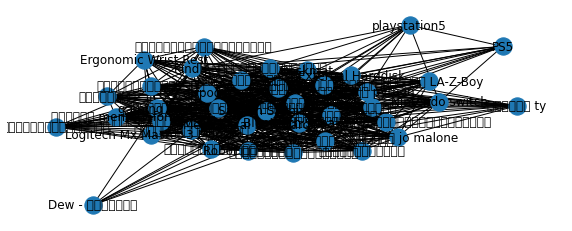

In [171]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

# For basket market

### คือ เมื่อมีการซื้อสินค้า A มักจะซื้อสินค้า B ด้วย
### ถ้าจะต้องโปรโมทสินค้า 
### ผมเลือก **ยาดม** คู่กับ **พลาสเตอร์ตราเสือ** เป็น Package Promotion คู่ครับ เพราะดูแล้วเป็นไปได้มาก

# For Collaborative Recommendation
### คือ ลักษณะของพฤติกรรมการซื้อสินค้าที่คล้ายๆกัน
### ผมจะเลือก ทรายน้องแมว กับ น้ำพุของน้องแมว 
### คือ ถ้าลูกค้าสนใจอันใดอันหนึ่งแล้วยังไม่สนใจ เราจะช่วยแนะนำอีกอันหนึ่งให้